### Examén Parcial 3

María Fernanda Muñoz Sevilla

1- Realiza una regresión lineal simple para predecir la variable "sales" usando el resto de las variables en el dataset.

In [24]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 4.2 MB/s eta 0:00:17
   - -------------------------------------- 1.8/72.0 MB 5.9 MB/s eta 0:00:12
   - -------------------------------------- 2.9/72.0 MB 5.8 MB/s eta 0:00:12
   -- ------------------------------------- 3.9/72.0 MB 5.2 MB/s eta 0:00:14
   --- ------------------------------------ 5.5/72.0 MB 5.8 MB/s eta 0:00:12
   --- ------------------------------------ 6.8/72.0 MB 5.8 MB/s eta 0:00:12
   ---- ----------------------------------- 8.4/72.0 MB 6.0 MB/s eta 0:00:11
   ----- ---------------------------------- 9.4/72.0 MB 6.0 MB/s eta 0:00:11
   ------ --------------------------------- 11.5/72.0 MB 6.4 MB/s eta 0:00:10
   ------ --------------------------------- 12.1/72.0 MB 6.0 MB/s eta 0:00:11
   ------- -------------------------------- 12.8/72.0 MB 5.8 MB/s eta 0:00:11
   ------- -------------------------------- 13.6/72.0 MB 5.7 MB/s eta 0:00:11
  

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.outliers_influence import OLSInfluence
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split


In [28]:
ad= pd.read_csv("C:/Users/munoz/Downloads/lab_apre_est/Advertising.csv")
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
x1 = ad.TV.values.reshape([-1,1])
x2 = ad.radio.values.reshape([-1,1])
x3 = ad.newspaper.values.reshape([-1,1])
y1= ad.sales
n1=len(y1)
unos=np.ones([n1,1])
X=np.hstack([unos,x1,x2,x3])
ols=sm.OLS(y1,X)
resultados=ols.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.58e-96
Time:                        16:11:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2- Realiza una regresión con XGBoost para predecir la variable "sales" usando el resto de las variables en el dataset (con optimización de hiperparámetros).

In [38]:

xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=300)

search_spaces = {
    'learning_rate': Real(1e-3, 0.3, prior='log-uniform'),
    'max_depth': Integer(2, 8),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0.0, 5.0),
    'reg_alpha': Real(1e-6, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-6, 3.0, prior='log-uniform'),
    'min_child_weight': Integer(1, 10)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
bayes_cv_orig = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_spaces,
    n_iter=40,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

bayes_cv_orig.fit(X, y1)
print("Mejores hiperparámetros (original):", bayes_cv_orig.best_params_)
rmse_xgb_orig_cv = -bayes_cv_orig.best_score_
r2_xgb_orig_cv = cross_val_score(bayes_cv_orig.best_estimator_, X, y1, cv=cv, scoring='r2').mean()
print("XGB CV RMSE: ",rmse_xgb_orig_cv)
print("CV R2: ",r2_xgb_orig_cv)


Mejores hiperparámetros (original): OrderedDict({'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.02745870262767132, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 1e-06, 'reg_lambda': 1e-06, 'subsample': 0.5})
XGB CV RMSE:  0.6117081042051542
CV R2:  0.9854511280022326


3-Comprueba los 6 problemas potenciales dentro del resultado encontrado en el punto 1. Modifica tu dataset/X de acuerdo a los resultados y justifica cualquier cambio realizado (añadir interacciones, quitar factores, agregar polinomios, quitar muestras, etc)

### Linealidad

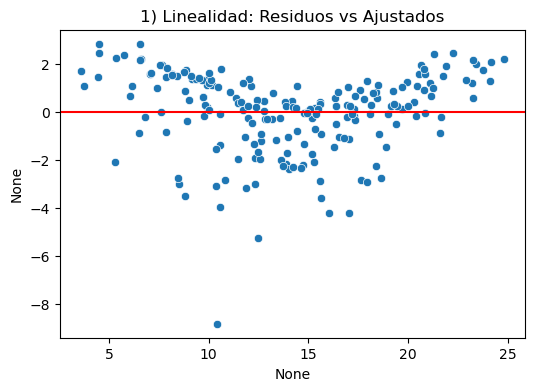

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color='red')
plt.title("1) Linealidad: Residuos vs Ajustados")
plt.show()


No hay linealidad

### Colinealidad

In [62]:
X = ad[['TV','radio','newspaper']]

# Convertir a NumPy para VIF
X_values = X.values

# Calcular VIF para cada columna
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_values, i) for i in range(X_values.shape[1])]

print(vif_data)


    Variable       VIF
0         TV  2.486772
1      radio  3.285462
2  newspaper  3.055245


No hay multicolinealidad, todo lo dejamos igual, pues nos dieron resultados aceptables

### Homoscedasticidad


In [67]:
bp_test = het_breuschpagan(resid, resultados.model.exog)
bp_labels = ['LM stat','LM p-value','F stat','F p-value']
bp = dict(zip(bp_labels, bp_test))
print(bp)


{'LM stat': 5.132872353285589, 'LM p-value': 0.162322158454125, 'F stat': 1.720904210291588, 'F p-value': 0.16399908905607216}


Si tenemos homoscedasticidad

### Outliers

In [133]:
influence = OLSInfluence(ols_result)
cooks = influence.cooks_distance[0]

threshold = 4 / len(ad)
outliers_idx = np.where(cooks > threshold)[0]

print("Umbral Cook's distance: ",threshold)
print("Outliers detectados: ",outliers_idx)

Umbral Cook's distance:  0.02
Outliers detectados:  [  5   8  35  56  66  78 130 155]


Si tenemos outliers los cuales necesitamos eliminar

### Normalidad de Errores

In [75]:
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(resid)
print("Jarque-Bera stat: ",jb_stat)
print("p-value: ",jb_pvalue)
print("skew: ",skew)
print("kurtosis: ", kurtosis)

Jarque-Bera stat:  151.24142047603885
p-value:  1.4399347942388453e-33
skew:  -1.3273536543621263
kurtosis:  6.331891289062519


No hay normalidad de errores, el p-value es muy pequeño

### Puntos palanca

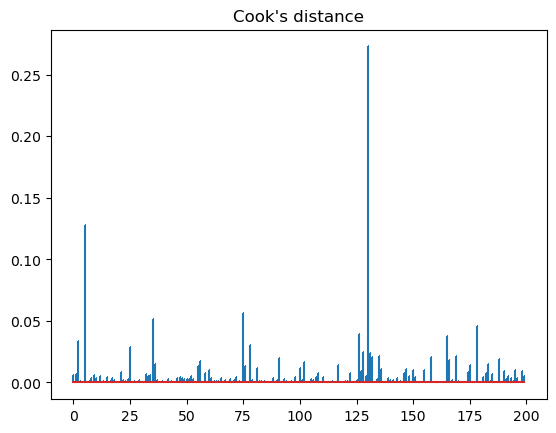

In [85]:
influence = OLSInfluence(resultados)
cooks = influence.cooks_distance[0]
plt.stem(cooks, markerfmt=",")
plt.title("Cook's distance")
plt.show()

Si tenemos puntos palanca, tenemos 2

### Correlación de errores

In [94]:
dw_stat = durbin_watson(resultados.resid)
print( dw_stat)

2.083648405294407


No muestran una correlación significativa, se cumple la independencia de errores

### Modificación

Eliminamos outliers, puntos palancas y creamos polinomios para lograr la linealidad

In [101]:
ad_mod = ad.drop(columns=['newspaper'])

ad_mod = ad.copy()
ad_mod['TV2'] = ad_mod['TV']**2
ad_mod['radio2'] = ad_mod['radio']**2
ad_mod['TV_radio'] = ad_mod['TV'] * ad_mod['radio']

X = ad_mod[['TV','radio','newspaper','TV2','radio2','TV_radio']]
y = ad_mod['sales']

Xc = sm.add_constant(X)

ols_model = sm.OLS(y, Xc)
ols_result = ols_model.fit()

In [103]:
influence = OLSInfluence(ols_result)
cooks = influence.cooks_distance[0]

threshold = 4 / len(ad_mod)
keep_idx = np.where(cooks <= threshold)[0]

ad_clean = ad_mod.iloc[keep_idx].reset_index(drop=True)
X_clean = ad_clean[['TV','radio','newspaper','TV2','radio2','TV_radio']]
y_clean = ad_clean['sales']
Xc_clean = sm.add_constant(X_clean)

4- Regresión lineal

In [105]:
ols_clean = sm.OLS(y_clean, Xc_clean).fit()
ols_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4624.
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          1.23e-198
Time:                        17:06:54   Log-Likelihood:                -100.27
No. Observations:                 192   AIC:                             214.5
Df Residuals:                     185   BIC:                             237.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6099      0.152     36.935      0.000       5.310       5.910
TV             0.0445      0.002     27.576      0.000       0.041       0.048
radio          0.0305      0.009      3.583      0.000       0.014       0.047
newspaper      0.0004      0.001      0.276      0.783      -0.003       0.003
TV2        -9.003e-05   4.99e-06    -18.053      0.000   -9.99e-05   -8.02e-05
radio2         0.0002      0.000      1.297      0.196      -0.000       0.001
TV_radio       0.0010   2.48e-05     42.285      0.000       0.001       0.001
==============================================================================
Omnibus:                       12.809   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.587
Skew:                          -0.521   Prob(JB):                     0.000680
Kurtosis:                       3.859   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que el r^2 mejoró bastante respecto del anterior

5- Regreción con XGBoost

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42,
    n_jobs=-1
)

In [124]:


xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=300)

search_spaces = {
    'learning_rate': Real(1e-3, 0.3, prior='log-uniform'),
    'max_depth': Integer(2, 8),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0.0, 5.0),
    'reg_alpha': Real(1e-6, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-6, 3.0, prior='log-uniform'),
    'min_child_weight': Integer(1, 10)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
bayes_cv_orig = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_spaces,
    n_iter=40,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

bayes_cv_orig.fit(X, y)
print("Mejores hiperparámetros (original):", bayes_cv_orig.best_params_)
rmse_xgb_orig_cv = -bayes_cv_orig.best_score_
r2_xgb_orig_cv = cross_val_score(bayes_cv_orig.best_estimator_, X, y, cv=cv, scoring='r2').mean()
print("XGB CV RMSE: ",rmse_xgb_orig_cv)
print("CV R2: ",r2_xgb_orig_cv)

Mejores hiperparámetros (original): OrderedDict({'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.04663305695913122, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 1e-06, 'reg_lambda': 1e-06, 'subsample': 0.5011121348743726})
XGB CV RMSE:  0.4943261129370752
CV R2:  0.9906053068031238


6-Compara resultados entre puntos 1&4 y 2&5. ¿Qué observas?


En el punto 1 y 4, vemos que el r cuadrada mejoró significativamente, esto porque modificamos nuestro dataset, eliminando aquellos valores que ocasionaban problemas. En el punto 5 y 6, vemos que incremento el CV r2, esto lo hace menos predictivo con respecto al original